### Project: Heart Disease Prediction using TensorFlow

**Objective**    : To predict whether the patient has heart disease or not <br>
**Dataset used** : __[Heart disease dataset](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)__

#### About the dataset
This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them (13 features and 1 label). The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, datetime

In [2]:
data = pd.read_csv('../dataset/heart.csv')                                                  
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Dataset information: 
| # | Features|
|------|------|
|   1  | age  |     
|   2  | sex  |     
|   3  | cp (chest pain type 4 values)  |   
|   4  | trestbps (resting blood pressure)  |     
|   5  | chol (serum cholestrol)  |     
|   6  | fbs (fasting blood sugar > 120 mg/dl)  |    
|   7  | restecg (resting electrocardiographic results(values 0,1,2))   |    
|   8  | thalach (maximum heart rate achieved)  |     
|   9  | exang (exercise induced angina)  |     
|   10  | oldpeak (ST depression induced by exercise relative to rest)  | 
|   11  |slope (the slope of the peak exercise ST segment)   |   
|   12  | ca (number of major vessels (0-3) colored by flourosopy)  |
|   13  | thal (0 = normal; 1 = fixed defect; 2 = reversable defect)   |

Labels: target

In [3]:
data['target'].unique()

array([0, 1], dtype=int64)

If the patient has disease, it is denoted as '1' and if the patient has no disease, it is denoted as '0'

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


### Features and labels

In [5]:
labels = data['target']
features = data.drop('target',axis=1)
print("Heart Disease dataset has {} data points with {} variables each.".format(*data.shape))

Heart Disease dataset has 1025 data points with 14 variables each.


In [6]:
print('===================Features===================')
print(features.head())
print('===================Labels===================')
print(labels.head())

===================Features===================
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  
0   2     3  
1   0     3  
2   0     3  
3   1     3  
4   3     2  
===================Labels===================
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


### Train-Test Split

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train,y_test= train_test_split(features,labels,test_size=0.2,random_state=12345)

### Feature Scaling (Standardization)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Create Sequential Model

In [11]:
# Input shape
nIn = X_test.shape[1]

# Out shape = number of classes
nClass = len(np.unique(y_test))

In [12]:
inputs = keras.Input(shape=(nIn,))

model = keras.Sequential()
model.add(layers.InputLayer(input_shape=(nIn,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(8,activation='relu'))
model.add(layers.Dense(nClass, activation='softmax'))

### Summary of the model

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 8)                 1

### Compile model

In [14]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

### Early Stopping

In [15]:
es = EarlyStopping(patience=3,verbose=1,restore_best_weights=True)

### Training the Model

In [16]:
# Model training
BATCH_SIZE =16
EPOCHS= 50
history = model.fit(X_train, y_train, validation_data=(X_test,y_test),batch_size=BATCH_SIZE,epochs=EPOCHS,callbacks=[es])

Epoch 1/50
52/52 [==============================] - 2s 7ms/step - loss: 0.6490 - accuracy: 0.6000 - val_loss: 0.5891 - val_accuracy: 0.7171
Epoch 2/50
52/52 [==============================] - 0s 4ms/step - loss: 0.5301 - accuracy: 0.7695 - val_loss: 0.4389 - val_accuracy: 0.8244
Epoch 3/50
52/52 [==============================] - 0s 4ms/step - loss: 0.4377 - accuracy: 0.8207 - val_loss: 0.3526 - val_accuracy: 0.8683
Epoch 4/50
52/52 [==============================] - 0s 4ms/step - loss: 0.3859 - accuracy: 0.8415 - val_loss: 0.3201 - val_accuracy: 0.8829
Epoch 5/50
52/52 [==============================] - 0s 5ms/step - loss: 0.3817 - accuracy: 0.8451 - val_loss: 0.3232 - val_accuracy: 0.8732
Epoch 6/50
52/52 [==============================] - 0s 4ms/step - loss: 0.3703 - accuracy: 0.8561 - val_loss: 0.3034 - val_accuracy: 0.8878
Epoch 7/50
52/52 [==============================] - 0s 4ms/step - loss: 0.3379 - accuracy: 0.8585 - val_loss: 0.2963 - val_accuracy: 0.8927
Epoch 8/50
52/52 [==

### Model Evaluation

In [17]:
train_eval = model.evaluate(X_train,y_train)
test_eval = model.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.2389 - accuracy: 0.9171


In [18]:
# Train accuracy score
print(f"Train Evaluation : { round(train_eval[1]*100,2)}%")

# Test accuracy score
print(f"Test Evaluation : { round(test_eval[1]*100,2)}%")

Train Evaluation : 93.66%
Test Evaluation : 91.71%


### Visualization of Train and Test Results

In [19]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch_x = history.epoch

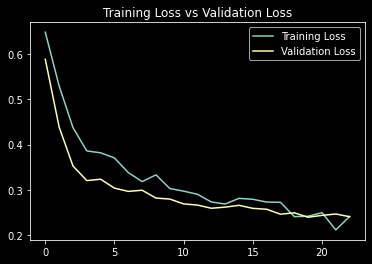

<Figure size 432x288 with 0 Axes>

In [20]:
plt.plot(epoch_x,train_loss, label='Training Loss')
plt.plot(epoch_x, val_loss, label='Validation Loss')
plt.title('Training Loss vs Validation Loss')
plt.legend()
plt.figure()
plt.show()

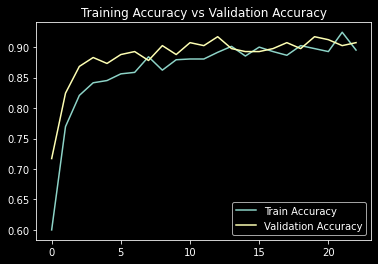

<Figure size 432x288 with 0 Axes>

In [21]:
plt.plot(epoch_x, train_acc,label='Train Accuracy')
plt.plot(epoch_x, val_acc, label='Validation Accuracy')
plt.title('Training Accuracy vs Validation Accuracy')
plt.legend()
plt.figure()

plt.show()

### Compare predictions with the actual label

In [22]:
predictions = np.argmax(model.predict(X_test),axis=1)

7/7 [==============================] - 0s 1ms/step


In [25]:
label_vs_prediction = np.transpose(np.vstack((y_test,predictions)))
label_vs_prediction

array([[1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0,

In [24]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(f"Confusion Matrix : \n {confusion_matrix(predictions,y_test)}")

Confusion Matrix : 
 [[100   6]
 [ 11  88]]


## Findings
We have built a FeedForward Neural Network which performs well with a Training accuracy of 93% and Test accuracy of 91%